### 链表

应用：CPU缓存、数据库缓存、浏览器缓存

策略：先进先出 FIFO(first in,first out)、最少使用 LFU(least frequently used)、最近最少使用 LRU(least recently used)

通过“指针”将一组零散的内存块串联起来使用
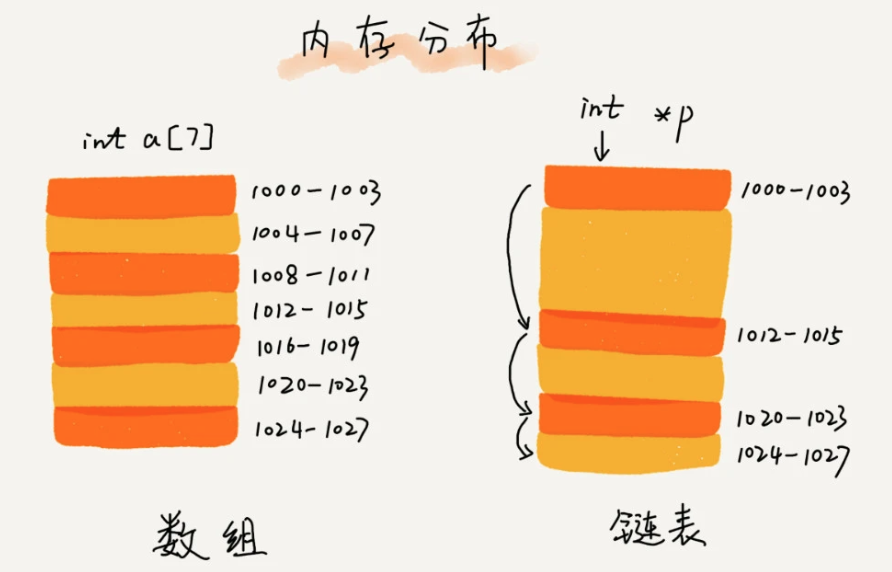

时间复杂度：
插入：O(1)
删除：O(1) 实际需要进行遍历O(n)
查询：O(n)

#### 数组 vs 链表

##### 时间复杂度
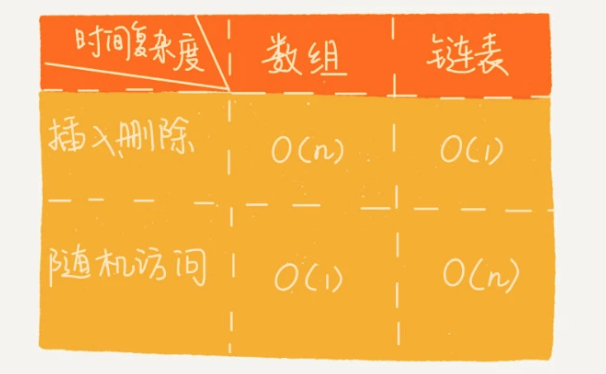

##### 访问效率
数组：连续的存储空间，可以借助CPU的缓存机制，预读数组中的数据，所以访问效率更高

链表：在内存中并不是连续存储的，所以对CPU缓存不友好，没办法有效预读

##### 内存空间利用
数组：
1. 缺点大小固定，一经声明则需要占用整块连续内存空间，超出声明的空间大小则需要申请更大的内存空间，并把原数组拷贝进去，非常耗时（ArrayList支持动态扩容也是需要在扩容的时候把原有数据拷贝到新的内存空间上）；
2. 只需要存储数据的内存空间

链表：
1. 本身没有大小的显示，天然支持动态扩容；
2. 链表中的每个结点需要消耗额外的存储空间存储下个结点的指针，内存消耗会增加；而且对链表进行频繁的插入、删除操作，会导致频繁的内存申请和释放，容易造成内存碎片。（在Java中，可能会导致频繁的GC)

```
CPU在从内存读取数据的时候，会先把读取到的数据加载到CPU的缓存中。而CPU每次从内存读取数据并不是只读取那个特定要访问的地址，而是读取一个数据块(多级缓存策略，L1L2L3，每次读取一个cache line，大小为64字节(可配))并保存到CPU缓存中，然后下次访问内存数据的时候就会先从CPU缓存开始查找，如果找到就不需要再从内存中取。这样就实现了比内存访问速度更快的机制，也就是CPU缓存存在的意义:为了弥补内存访问速度过慢与CPU执行速度快之间的差异而引入。

对于数组来说，存储空间是连续的，所以在加载某个下标的时候可以把以后的几个下标元素也加载到CPU缓存这样执行速度会快于存储空间不连续的链表存储。
```

   



##### 链表类型

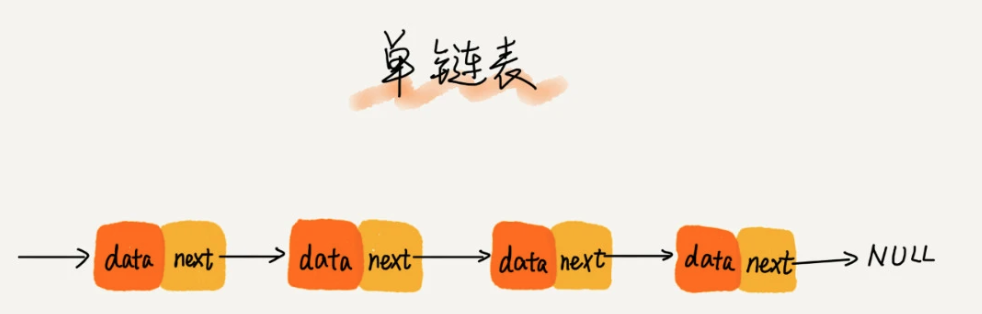

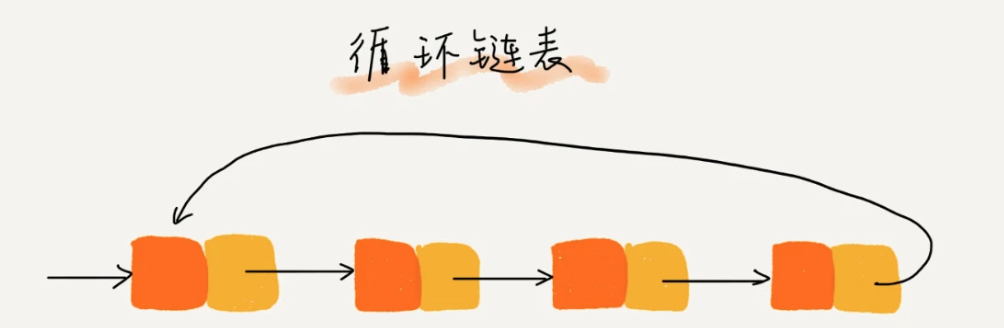

双向链表需要额外的两个空间来存储后继结点和前驱结点的地址。所以，如果存储同样多的数据，双向链表要比单链表占用更多的内存空间。虽然两个指针比较浪费空间，但是支持双向遍历。

实际应用：Java LinkedHashMap

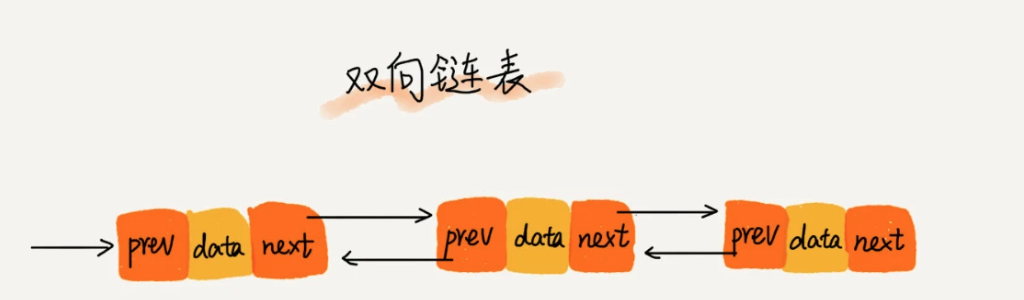

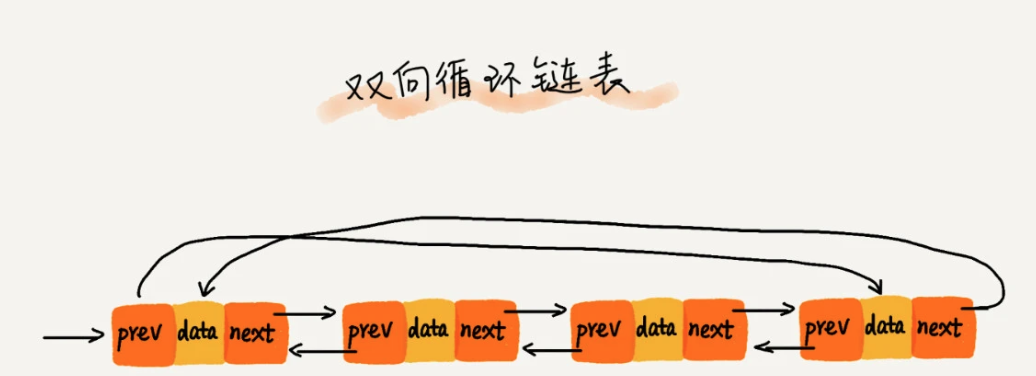


#### 重点留意边界条件处理

经常用来检查链表是否正确的边界4个边界条件：
1. 如果链表为空时，代码是否能正常工作？
2. 如果链表只包含一个节点时，代码是否能正常工作？
3. 如果链表只包含两个节点时，代码是否能正常工作？
4. 代码逻辑在处理头尾节点时是否能正常工作？

5个常见的链表操作：
1. 单链表反转
2. 链表中环的检测
3. 两个有序链表合并
4. 删除链表倒数第n个节点
5. 求链表的中间节点

练习题LeetCode对应编号：206，141，21，19，876

##### 哨兵
利用“哨兵”简化实现难度
1. 什么是“哨兵”？
链表中的“哨兵”节点是解决边界问题的，不参与业务逻辑。如果我们引入“哨兵”节点，则不管链表是否为空，head指针都会指向这个“哨兵”节点。我们把这种有“哨兵”节点的链表称为带头链表，相反，没有“哨兵”节点的链表就称为不带头链表。
2. 未引入“哨兵”的情况
如果在p节点后插入一个节点，只需2行代码即可搞定：

```
new_node—>next = p—>next;
p—>next = new_node;
```

但，若向空链表中插入一个节点，则代码如下：

```
if(head == null){
    head = new_node;
}
```

如果要删除节点p的后继节点，只需1行代码即可搞定：

```
p—>next = p—>next—>next;
```

但，若是删除链表的最有一个节点（链表中只剩下这个节点），则代码如下：

```
if(head—>next == null){
    head = null;
}
```

从上面的情况可以看出，针对链表的插入、删除操作，需要对插入第一个节点和删除最后一个节点的情况进行特殊处理。这样代码就会显得很繁琐，所以引入“哨兵”节点来解决这个问题。
1. 引入“哨兵”的情况
“哨兵”节点不存储数据，无论链表是否为空，head指针都会指向它，作为链表的头结点始终存在。这样，插入第一个节点和插入其他节点，删除最后一个节点和删除其他节点都可以统一为相同的代码实现逻辑了。
1. “哨兵”还有哪些应用场景？
这个知识有限，暂时想不出来呀！但总结起来，哨兵最大的作用就是简化边界条件的处理。

##### 约瑟夫问题


In [9]:
'''
leetcode 
141 linked list has cycle
'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        if not head or not head.next:
            return False

        slow, fast = head,head.next

        while slow != fast:
            if not fast or not fast.next:
                return False
            slow, fast = slow.next, fast.next.next
        return True


IndexError: list assignment index out of range

In [ ]:
'''
leetcode medium

142. Linked List Cycle II Medium

Given the head of a linked list, return the node where the cycle begins. If there is no cycle, return null.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to (0-indexed). It is -1 if there is no cycle. Note that pos is not passed as a parameter.

Do not modify the linked list.

Input: head = [3,2,0,-4]（-4->2）, pos = 1
Output: tail connects to node index 1
Explanation: There is a cycle in the linked list, where tail connects to the second node.

返回 环 开始的节点
'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head or not head.next:
            return None

        slow, fast = head, head

        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next

            # 相遇-> 有环
            if slow == fast:
                slow = head
                while slow != fast:
                    slow = slow.next
                    fast = fast.next
                return slow
                     
        return None
        

In [ ]:
'''
leetcode medium
21 merge 2 sorted linked list
'''

# Definition for singly-linked list.
from typing import Optional

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
        if not list1:
            return list2
        if not list2:
            return list1

        head = ListNode()
        next = head

        h1, h2 = list1, list2
        
        while h1 and h2:
            if h1.val <= h2.val:
                next.next = h1
                h1 = h1.next
            else:
                next.next = h2
                h2 = h2.next
            next = next.next
        if h1:
            next.next = h1
        
        if h2:
            next.next = h2


        return head.next

In [ ]:
'''
leetcode hard
23 merge k sorted list

'''

from typing import List, Optional
import heapq
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    '''
    runtime 70ms, beats 88.68%
    memory 19.96MB, beats 12%... 
    '''
    def mergeKLists_with_bad_memory(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        nodeValues = []
        for l in lists:
            while l:
                nodeValues.append(l.val)
                l = l.next
        
        head = ListNode()
        spot = head
        nodeValues.sort()

        for n in nodeValues:
            spot.next = ListNode(val=n)
            spot = spot.next
        
        return head.next

    '''
    runtime 73ms, beats 79.68%
    memory 19.66MB, beats 46%... 
    '''
    def mergeKLists_with_heap(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        # 为什么 priority 要取 listNode.val
        # 使用元组来包含优先级值和实际的元素。heapq 会首先比较元组的第一个元素（优先级），如果相等，则比较第二个元素，以此类推。
        ListNode.__eq__ = lambda self, other: self.val == other.val
        ListNode.__lt__ = lambda self, other: self.val < other.val

        if not lists:
            return None

        head = ListNode()
        spot = head

        # 获取 list 的所有 head
        # 添加元素到优先级队列
        # heapq.heappush(priority_queue, (1, '任务1'))  # 低优先级
        # heapq.heappush(priority_queue, (5, '任务5'))  # 高优先级
        # heapq.heappush(priority_queue, (3, '任务3'))  # 中等优先级
        heads = []
        for l in lists:
            if not l:
                continue
            heapq.heappush(heads, (l.val, l))

        while heads:
            # heap1.heappop(h) -> (val, node) -> [1] -> node
            node = heapq.heappop(heads)[1]
            spot.next = node
            spot = spot.next

            if node.next:
                heapq.heappush(heads, (node.next.val, node.next))

        return head.next
    
    def mergeKLists_whth_heap2(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        h = []
        head = tail = ListNode(0)
        for i in range(len(lists)):
            if not lists[i]:
                continue
            heapq.heappush(h, (lists[i].val, i, lists[i]))

        while h:
            node = heapq.heappop(h)
            node = node[2]
            tail.next = node
            tail = tail.next
            if node.next:
                i+=1
                heapq.heappush(h, (node.next.val, i, node.next))

        return head.next


'''
java version

runtime 4ms, beats 74.68%
memory 44.28MB, beats 60.8%... 

/**
 * Definition for singly-linked list.
 * public class ListNode {
 *     int val;
 *     ListNode next;
 *     ListNode() {}
 *     ListNode(int val) { this.val = val; }
 *     ListNode(int val, ListNode next) { this.val = val; this.next = next; }
 * }
 */
class Solution {
    public ListNode mergeKLists(ListNode[] lists) {
        if (lists==null||lists.length==0) return null;
        
        PriorityQueue<ListNode> queue= new PriorityQueue<ListNode>(lists.length,new Comparator<ListNode>(){
            @Override
            public int compare(ListNode o1,ListNode o2){
                if (o1.val<o2.val)
                    return -1;
                else if (o1.val==o2.val)
                    return 0;
                else 
                    return 1;
            }
        });
        
        ListNode dummy = new ListNode(0);
        ListNode tail=dummy;
        
        for (ListNode node:lists)
            if (node!=null)
                queue.add(node);
            
        while (!queue.isEmpty()){
            tail.next=queue.poll();
            tail=tail.next;
            
            if (tail.next!=null)
                queue.add(tail.next);
        }
        return dummy.next;
    }
}
'''
        

        

In [ ]:
'''
leetcode 
206 Reverse linked list
'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head or not head.next:
            return head

        pre, curr = None, head
        while curr:
            next = curr.next
            curr.next = pre
            pre = curr
            curr = next

        return pre

In [14]:

'''
leetcode 
19 delete last n node
'''
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        if not head: return head
        slow = fast = head
        for _ in range(n):
            fast = fast.next

        if not fast: # 相当于删除了第一个元素
            return head.next
        while fast.next:
            slow, fast = slow.next, fast.next
        slow.next = slow.next.next
        return head

0


In [ ]:
'''
leetcode
876 middle of the linked list
'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def middleNode(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head or not head.next:
            return head
        
        slow = fast = head
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next
        return slow
        

In [23]:
'''
leetcode

LRU
1 <= capacity <= 3000
0 <= key <= 104
0 <= value <= 105

'''

class LRUCache:
    class Node:
        def __init__(self, key, val):
            self.key = key
            self.val = val
            self.prev = None
            self.next = None

    def __init__(self, capacity: int):
        self.cap = capacity
        self.head = self.Node(-1, -1)
        self.tail = self.Node(-1, -1)
        self.head.next = self.tail
        self.tail.prev = self.head
        self.m = {}

    def addLatestNode(self, newNode):
        tmp = self.head.next
        newNode.next = tmp
        newNode.prev  = self.head
        self.head.next = newNode
        tmp.prev = newNode

        self.m[newNode.key] = newNode # 关键一步，不能遗漏

    def deleteNode(self, delNode):
        delNode.prev.next = delNode.next
        delNode.next.prev = delNode.prev

        self.m.pop(delNode.key, None) # 关键一步，不能遗漏

    def refreshNode(self, node):
        self.deleteNode(node)
        self.addLatestNode(node)

    def get(self, key: int) -> int:
        fineNode = self.m.get(key, None)

        if not fineNode:
            return -1

        self.refreshNode(fineNode)
        return fineNode.val
        
    def put(self, key: int, value: int) -> None:
        curr = self.m.get(key, None)
        if curr:
            self.deleteNode(curr)

        if len(self.m) == self.cap:
            self.deleteNode(self.tail.prev)

        self.addLatestNode(self.Node(key, value))
 


# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)

KeyError: 1

In [32]:
'''
leetcode 
2 add two numbers

Input: l1 = [2,4,3], l2 = [5,6,4]
Output: [7,0,8]
Explanation: 342 + 465 = 807.
Example 2:

Input: l1 = [0], l2 = [0]
Output: [0]
'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        newHead = ListNode(0)
        flagNode = newHead
        div = 0
        
        lg1, lg2 = l1, l2
        while lg1 or lg2 or div != 0:
            v1 = lg1.val if lg1 else 0
            v2 = lg2.val if lg2 else 0
            flagVal = div  + v1 + v2
            flagValMod = flagVal % 10
            div = flagVal // 10

            newNode = ListNode(flagValMod)
            flagNode.next = newNode
            flagNode = newNode

            lg1 = lg1.next if lg1 else None
            lg2 = lg2.next if lg2 else None

        result  = newHead.next
        newHead.next = None
        return result

        

0.0 1


In [35]:
'''
leetcode
92 Reverse Linked List
medium 

Given the head of a singly linked list and two integers left and right where left <= right, reverse the nodes of the list from position left to position right, and return the reversed list.

Input: head = [1,2,3,4,5], left = 2, right = 4
Output: [1,4,3,2,5]
'''
class Solution:
    def reverseBetween(self, head: Optional[ListNode], left: int, right: int) -> Optional[ListNode]:
        if not head or left == right:
            return head
        
        dummy = ListNode(0, head)
        prev = dummy
        
        for _ in range(left - 1):
            prev = prev.next
        
        current = prev.next
        
        for _ in range(right - left):
            next_node = current.next
            # 依次将current后面一个元素转移到 pre 后面，current.next 也依次往后转移
            # 相当于每次只将 current 和其后面一个元素发生变化
            # current.next = next_node.next -> current 往后走一步；next.prev.next,prev.next=next 就是将 next 移到 pre后面
            current.next, next_node.next, prev.next = next_node.next, prev.next, next_node 

        result = dummy.next
        dummy.next = None
        return result

In [38]:
'''
leetcode
138
Construct a deep copy of the list. The deep copy should consist of exactly n brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

Input: head = [[7,null],[13,0],[11,4],[10,2],[1,0]]
Output: [[7,null],[13,0],[11,4],[10,2],[1,0]]

'''

"""
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
"""

class Solution:
    def copyRandomList(self, head: 'Optional[Node]') -> 'Optional[Node]':
        if not head:
            return None
        
        old_to_new  = {}

        curr = head
        while curr:
            old_to_new[curr] = Node(curr.val)
            curr = curr.next

        curr = head
        while curr:
            old_to_new[curr].next = old_to_new.get(curr.next) if curr.next else None
            old_to_new[curr].random = old_to_new.get(curr.random) if curr.random else None
            curr = curr.next
        
        return old_to_new[head]

2

In [ ]:
'''
leetcode
82 Remove dumplicates from sorted linked list

Input: head = [1,2,3,3,4,4,5]
Output: [1,2,5]

Input: head = [1,1,1,2,3]
Output: [2,3]

-100 <= Node.val <= 100
'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def deleteDuplicates(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head or not head.next:
            return head

        dummy = ListNode(-101)
        dummy.next = head

        prev, curr = dummy, dummy.next
        while curr:
            while curr.next and curr.val == curr.next.val:
                curr = curr.next
            
            if prev.next == curr:
                prev = prev.next # 不可以写成 prev = curr，会导致prev的指针乱了
                curr = curr.next
            else:
                prev.next = curr.next
                curr = curr.next

        return dummy.next
        

In [ ]:
'''
leetcode
19 remove the Nth node from the end of linked list

Input: head = [1,2,3,4,5], n = 2
Output: [1,2,3,5]

Input: head = [1,2], n = 1
Output: [1]

'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        if not head: return head

        slow = fast = head
        for _ in range(n):
            fast = fast.next

        if not fast: # 相当于删除了第一个元素
            return head.next
            
        while fast.next:
            slow, fast = slow.next, fast.next
        slow.next = slow.next.next
        return head

In [ ]:
'''
leetcode
61 rotate linked list

Given the head of a linked list, rotate the list to the right by k places.

Input: head = [1,2,3,4,5], k = 2
Output: [4,5,1,2,3]

Input: head = [0,1,2], k = 4
Output: [2,0,1]

'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def rotateRight(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        if not head or not head.next:
            return head

        tail = head
        nodeCount = 1
        while tail.next:
            nodeCount +=1
            tail = tail.next
        
        tail.next = head
        k = k % nodeCount
        tmpH = head
        for _ in range(nodeCount-k-1):
            tmpH = tmpH.next

        newH = tmpH.next
        tmpH.next = None
        return newH 
        

In [ ]:
'''
leetcode
86 partition list

Given the head of a linked list and a value x, partition it such that all nodes less than x come before nodes greater than or equal to x.

You should preserve the original relative order of the nodes in each of the two partitions.

Input: head = [1,4,3,2,5,2], x = 3
Output: [1,2,2,4,3,5]

Input: head = [2,1], x = 2
Output: [1,2]


'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def partition(self, head: Optional[ListNode], x: int) -> Optional[ListNode]:
        if not head or not head.next:
            return head
        
        dummy1, dummy2 = ListNode(-101), ListNode(-101)
        l1, l2 = dummy1, dummy2

        node = head
        while node:
            if node.val < x:
                l1.next = node
                l1 = l1.next
            else:
                l2.next = node
                l2 = l2.next
            node = node.next
        
        
        l2.next = None # 必须的，如果最后一个数<x
        l1.next = dummy2.next
        # dummy2.next = None # 内存释放

        return dummy1.next





        

In [ ]:
'''
'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
    
        curr = head
        for _ in range(k):
            if not curr:
                return head
            curr = curr.next
        

        prev, curr = None, head
        for _ in range(k):
            next = curr.next
            curr.next = prev
            prev = curr
            curr = next

        # head变成tail，在tail后继续跟后续列表的局部reverse结果
        head.next = self.reverseKGroup(curr, k)
        return prev
        

In [ ]:
'''
leetcode medium

24. Swap Nodes in Pairs

Given a linked list, swap every two adjacent nodes and return its head. You must solve the problem without modifying the values in the list's nodes (i.e., only nodes themselves may be changed.)

Input: head = [1,2,3,4]
Output: [2,1,4,3]
Example 2:

Input: head = []
Output: []
Example 3:

Input: head = [1]
Output: [1]

'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def swapPairs(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head or not head.next:
            return head
        
        dummy = ListNode()
        dummy.next = head
        n1, n2, n3 = dummy, dummy, dummy


        while n1.next and n1.next.next:
            n2, n3 = n1.next, n1.next.next

            n2.next = n3.next
            n3.next = n2
            n1.next = n3

            n1 = n2
        
        return dummy.next